<a href="https://colab.research.google.com/github/menguri/Parking-Demand-Expecting/blob/main/%5B%EB%B0%8D%EB%B0%8D%EA%B5%AC%2C_Private_41%EC%9C%84%2C_Private_%EC%A0%90%EC%88%98_108_13%5D_Stacking_%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **주차수요 예측 AI**

**목차:**

**I. 데이터 불러오기 및 확인**
- 데이터 불러오기

**II. EDA & FE**
- Data Processing
- concat
- 타겟변수 확인
- 결측치 확인 및 처리
- 순서형과 명목형 데이터 분리
- 파생 변수 생성
- 수치형 변수 확인
- 범주형 변수 확인
- box-cox 변환
- 중요 변수 확인

**III. 모델링**
- 단순선형 회귀 & 통계치확인
- RobustScaler
- KFold
- 파라미터 튜닝 & GridSearchCV

**IV. 예측**
- 앙상블
- voting
- stacking
- blending

In [ ]:
# github 연동
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
cd '/content/drive/MyDrive/Data Science/Colab Notebooks/주차수요 예측 AI (41 504)'

In [ ]:
!git clone https://github.com/menguri/Parking-Demand-Expecting.git
!git init
!git config --global user.email "tatalintelli@gmail.com"
!git config --global user.name "menguri"

Cloning into 'Parking-Demand-Expecting'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.
Initialized empty Git repository in /content/drive/My Drive/Data Science/Colab Notebooks/주차수요 예측 AI (41 504)/.git/


In [ ]:
!ls
!git add .
!git status

 age_gender_info.csv
'주차수요 예측 AI'
 Parking-Demand-Expecting
'[밍밍구,  Private 41위, Private 점수: 108.13] Stacking 모델'
 README.md
 sample_submission.csv
 submission.csv
 test.csv
 train.csv
On branch master
Changes to be committed:
  (use "git reset HEAD <file>..." to unstage)

	modified:   "[\341\204\206\341\205\265\341\206\274\341\204\206\341\205\265\341\206\274\341\204\200\341\205\256,  Private 41\341\204\213\341\205\261, Private \341\204\214\341\205\245\341\206\267\341\204\211\341\205\256: 108.13] Stacking \341\204\206\341\205\251\341\204\203\341\205\246\341\206\257"



**I. 데이터 불러오기 및 확인**

a. 데이터 불러오기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import Image

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache dire

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/주차수요 예측 AI/test.csv')
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/주차수요 예측 AI/train.csv')
age_gender_info = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/주차수요 예측 AI/age_gender_info.csv')

In [ ]:
# 데이터 확인
train.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0


In [ ]:
# 임대보증금, 임대료, 지하철역 수, 버스정류장 수 등에서 결측치 존재
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2952 non-null   object 
 1   총세대수                          2952 non-null   int64  
 2   임대건물구분                        2952 non-null   object 
 3   지역                            2952 non-null   object 
 4   공급유형                          2952 non-null   object 
 5   전용면적                          2952 non-null   float64
 6   전용면적별세대수                      2952 non-null   int64  
 7   공가수                           2952 non-null   float64
 8   자격유형                          2952 non-null   object 
 9   임대보증금                         2383 non-null   object 
 10  임대료                           2383 non-null   object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2741 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2948 non-null   float64
 13  단지내

In [ ]:
# 추가 데이터 합치기
# 해당 지역 30/40/50 대 비율도 표에 포함시키기. -> train, test 셋 모두.

age_gender_info['해당 지역 30대 비율'] = age_gender_info['30대(남자)'] + age_gender_info['30대(여자)']
age_gender_info['해당 지역 40대 비율'] = age_gender_info['40대(남자)'] + age_gender_info['40대(여자)']
age_gender_info['해당 지역 50대 비율'] = age_gender_info['50대(남자)'] + age_gender_info['50대(여자)']

print(age_gender_info[age_gender_info['지역'] == '경상북도']['해당 지역 30대 비율'])

age = age_gender_info[['지역','해당 지역 30대 비율','해당 지역 40대 비율','해당 지역 50대 비율']]
print(age)
train = pd.merge(train, age)
test = pd.merge(test, age)
test

0    0.103005
Name: 해당 지역 30대 비율, dtype: float64
         지역  해당 지역 30대 비율  해당 지역 40대 비율  해당 지역 50대 비율
0      경상북도      0.103005      0.156273      0.159295
1      경상남도      0.113964      0.144691      0.159442
2     대전광역시      0.135501      0.142592      0.154570
3       경기도      0.141036      0.161562      0.142203
4      전라북도      0.098623      0.143650      0.155790
5       강원도      0.114142      0.144203      0.159443
6     광주광역시      0.131304      0.159212      0.147345
7      충청남도      0.132398      0.152278      0.148467
8     부산광역시      0.095915      0.122722      0.151754
9   제주특별자치도      0.098834      0.153078      0.157333
10    울산광역시      0.105241      0.140767      0.152554
11     충청북도      0.117694      0.154967      0.157023
12     전라남도      0.111448      0.154082      0.157760
13    대구광역시      0.133032      0.138067      0.165291
14    서울특별시      0.099532      0.122889      0.141963
15  세종특별자치시      0.210567      0.150086      0.123696


,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,해당 지역 30대 비율,해당 지역 40대 비율,해당 지역 50대 비율
0,C1072,754,아파트,경기도,국민임대,39.79,116,14.0,H,22830000,189840,0.0,2.0,683.0,0.141036,0.161562,0.142203
1,C1072,754,아파트,경기도,국민임대,46.81,30,14.0,A,36048000,249930,0.0,2.0,683.0,0.141036,0.161562,0.142203
2,C1072,754,아파트,경기도,국민임대,46.90,112,14.0,H,36048000,249930,0.0,2.0,683.0,0.141036,0.161562,0.142203
3,C1072,754,아파트,경기도,국민임대,46.90,120,14.0,H,36048000,249930,0.0,2.0,683.0,0.141036,0.161562,0.142203
4,C1072,754,아파트,경기도,국민임대,51.46,60,14.0,H,43497000,296780,0.0,2.0,683.0,0.141036,0.161562,0.142203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,C1229,453,아파트,세종특별자치시,행복주택,38.20,68,23.0,J,30101000,120400,0.0,2.0,317.0,0.210567,0.150086,0.123696
1018,C1229,453,아파트,세종특별자치시,행복주택,38.20,8,23.0,J,30101000,120400,0.0,2.0,317.0,0.210567,0.150086,0.123696
1019,C1229,453,아파트,세종특별자치시,행복주택,38.25,3,23.0,J,30101000,120400,0.0,2.0,317.0,0.210567,0.150086,0.123696
1020,C1229,453,아파트,세종특별자치시,행복주택,38.28,4,23.0,J,30101000,120400,0.0,2.0,317.0,0.210567,0.150086,0.123696


**II. EDA & FE**

a.Data Processing

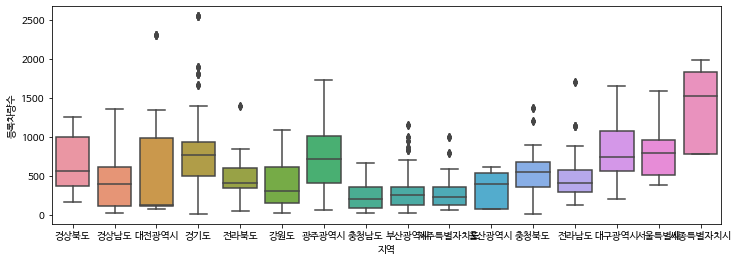

In [ ]:
fig, axs = plt.subplots(figsize = (12,4))
sns.boxplot(x = train['지역'],y = train['등록차량수'])

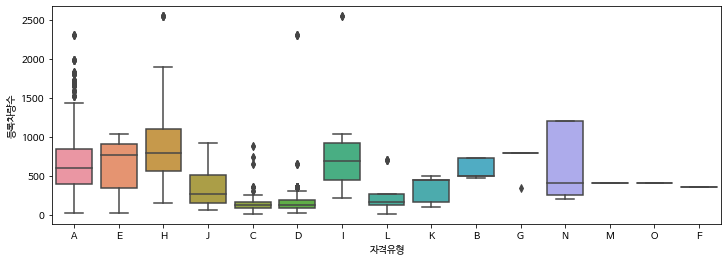

In [ ]:
fig, axs = plt.subplots(figsize = (12,4))
sns.boxplot(x = train['자격유형'],y = train['등록차량수'])

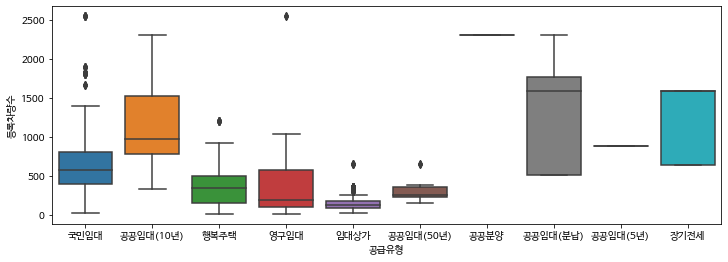

In [ ]:
fig, axs = plt.subplots(figsize = (12,4))
sns.boxplot(x = train['공급유형'],y = train['등록차량수'])

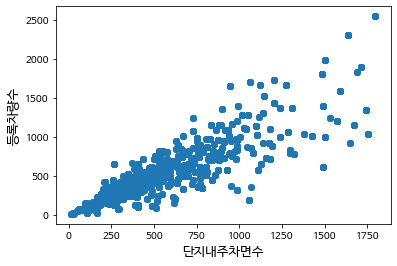

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = train['단지내주차면수'], y = train['등록차량수'])
plt.ylabel('등록차량수', fontsize=13)
plt.xlabel('단지내주차면수', fontsize=13)
plt.show()

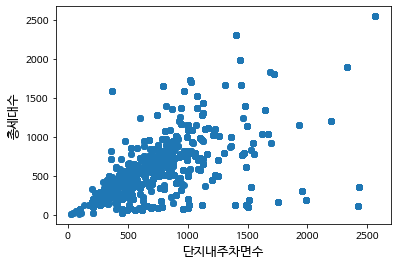

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = train['총세대수'], y = train['등록차량수'])
plt.ylabel('총세대수', fontsize=13)
plt.xlabel('단지내주차면수', fontsize=13)
plt.show()

In [ ]:
cor = train.corr()
cor_fe = cor.index[abs(cor['등록차량수']) >= 0.2]
cor_fe

Index(['총세대수', '전용면적별세대수', '단지내주차면수', '등록차량수', '해당 지역 30대 비율', '해당 지역 40대 비율',
       '해당 지역 50대 비율'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


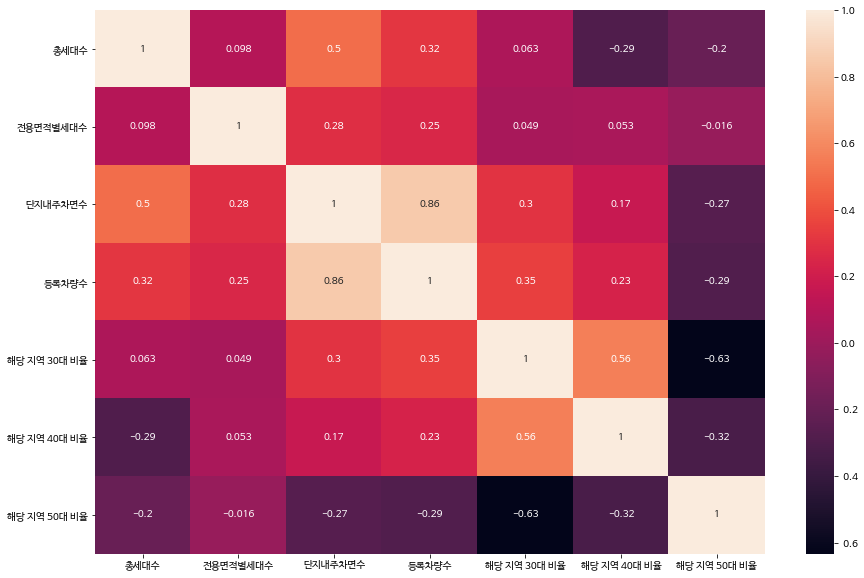

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(train[cor_fe].corr(),annot=True)

b.concat

In [ ]:

# test의 list 뽑기
t_name = list(test)
# train에 test list만 남기고 버리기
df_train = train[t_name]
# 합치기 -> 등록차량수 자연스럽게 없어진다.
df = pd.concat((df_train,test))

print(train.shape, test.shape, df.shape)

(2952, 18) (1022, 17) (3974, 17)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3974 entries, 0 to 1021
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          3974 non-null   object 
 1   총세대수                          3974 non-null   int64  
 2   임대건물구분                        3974 non-null   object 
 3   지역                            3974 non-null   object 
 4   공급유형                          3974 non-null   object 
 5   전용면적                          3974 non-null   float64
 6   전용면적별세대수                      3974 non-null   int64  
 7   공가수                           3974 non-null   float64
 8   자격유형                          3972 non-null   object 
 9   임대보증금                         3225 non-null   object 
 10  임대료                           3225 non-null   object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  3721 non-null   float64
 12  도보 10분거리 내 버스정류장 수            3970 non-null   float64
 13  단지내

c.타겟변수 확인

In [ ]:
from scipy import stats
from scipy.stats import norm

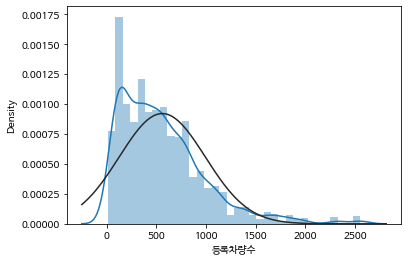

In [ ]:
sns.distplot(train['등록차량수'],fit = norm)

((array([-3.49754767, -3.25354064, -3.11858985, ...,  3.11858985,
          3.25354064,  3.49754767]),
  array([  13.,   13.,   13., ..., 2550., 2550., 2550.])),
 (407.94178524924445, 559.7682926829267, 0.9404675429966578))

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


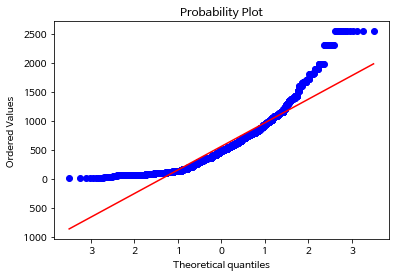

In [ ]:
stats.probplot(train['등록차량수'], plot=plt)

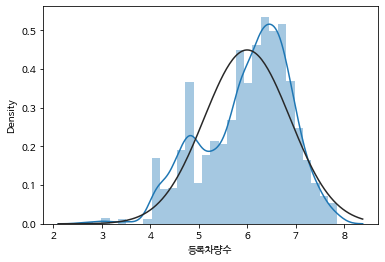

In [ ]:
# 등록차량수 target 값의 정규성 확보
train['등록차량수'] = np.log1p(train["등록차량수"])
sns.distplot(train['등록차량수'],fit=norm)

((array([-3.49754767, -3.25354064, -3.11858985, ...,  3.11858985,
          3.25354064,  3.49754767]),
  array([2.63905733, 2.63905733, 2.63905733, ..., 7.84424072, 7.84424072,
         7.84424072])),
 (0.8746754563093113, 5.998125323912191, 0.9835622683570542))

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


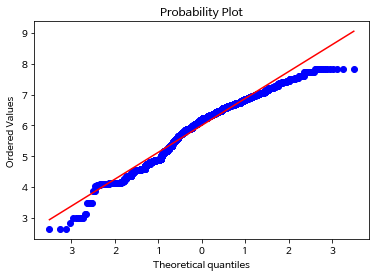

In [ ]:
stats.probplot(train['등록차량수'], plot=plt)

In [ ]:
target = train['등록차량수']

d.결측치 확인 및 처리

In [ ]:
null_df = (df.isna().sum() / len(df)) *100
null_df = null_df.drop(null_df[null_df == 0].index).sort_values(ascending=False)[:8]
missing_data = pd.DataFrame({'Missing Ratio' :null_df})
missing_data.head(20)

,Missing Ratio
임대료,18.847509
임대보증금,18.847509
도보 10분거리 내 지하철역 수(환승노선 수 반영),6.366381
도보 10분거리 내 버스정류장 수,0.100654
자격유형,0.050327


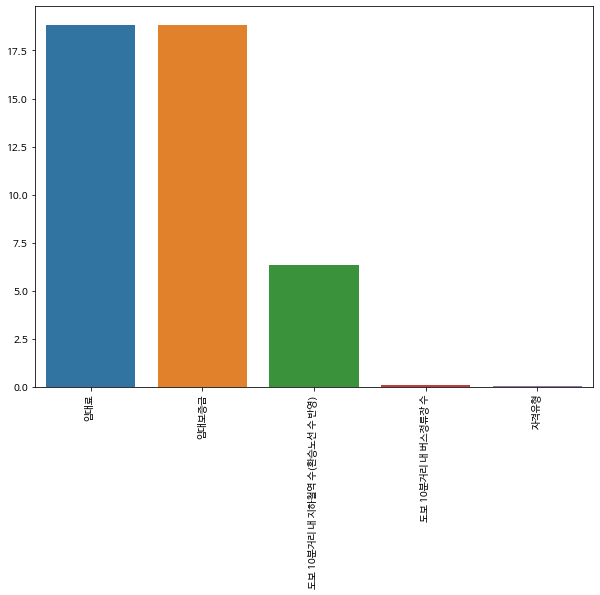

In [ ]:
f, ax = plt.subplots(figsize=(10, 7))
plt.xticks(rotation='90')
sns.barplot(x=null_df.index, y=null_df)

- 임대료와 임대보증금은 지역을 기준으로 중간값 산출한다.
- 도로 10분거리 내 지하철역/ 버스정거장 수는 지역을 기준으로 평균 산출
- 자격유형은 빈도수가 제일 큰 'A'로 대체

In [ ]:
df["자격유형"] = df["자격유형"].fillna("A")
# 임대로, 임대보증금에 '-' 이 섞여있다. 이것을 결측치로 먼저 바꿔주기.
df = df.replace('-', '', regex=True)
for col in ('임대료', '임대보증금'):
  df[col] = pd.to_numeric(df[col])
  df[col] = df.groupby("지역")[col].transform(lambda x: x.fillna(x.mean()))
df["도보 10분거리 내 지하철역 수(환승노선 수 반영)"] = df.groupby("지역")["도보 10분거리 내 지하철역 수(환승노선 수 반영)"].transform(lambda x: x.fillna(x.mean()))
df["도보 10분거리 내 버스정류장 수"] = df.groupby("지역")["도보 10분거리 내 버스정류장 수"].transform(lambda x: x.fillna(x.mean()))
print(df.info())

# int 를 float형으로 바꿔주기
#for i in ['총세대수', '전용면적별세대수']:
#  df[i] = df[i].astype(float)

#print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3974 entries, 0 to 1021
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          3974 non-null   object 
 1   총세대수                          3974 non-null   int64  
 2   임대건물구분                        3974 non-null   object 
 3   지역                            3974 non-null   object 
 4   공급유형                          3974 non-null   object 
 5   전용면적                          3974 non-null   float64
 6   전용면적별세대수                      3974 non-null   int64  
 7   공가수                           3974 non-null   float64
 8   자격유형                          3974 non-null   object 
 9   임대보증금                         3974 non-null   float64
 10  임대료                           3974 non-null   float64
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  3974 non-null   float64
 12  도보 10분거리 내 버스정류장 수            3974 non-null   float64
 13  단지내

In [ ]:
# 결측치 제거완료

null_df = (df.isna().sum() / len(df)) *100
null_df = null_df.drop(null_df[null_df == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :null_df})
missing_data.head(20)

,Missing Ratio


e.순서형과 명목형 데이터 분리

In [ ]:
df_obj = df.select_dtypes(include='object')
li_obj = list(df_obj.columns)
df_obj.head(3)

,단지코드,임대건물구분,지역,공급유형,자격유형
0,C2483,아파트,경상북도,국민임대,A
1,C2483,아파트,경상북도,국민임대,A
2,C2483,아파트,경상북도,국민임대,A


In [ ]:
df_int = df.select_dtypes(exclude='object')
li_int = list(df_int.columns)
print(df_int.head(3))
df_int.info()


   총세대수   전용면적  전용면적별세대수  ...  해당 지역 30대 비율  해당 지역 40대 비율  해당 지역 50대 비율
0   900  39.72       134  ...      0.103005      0.156273      0.159295
1   900  39.72        15  ...      0.103005      0.156273      0.159295
2   900  51.93       385  ...      0.103005      0.156273      0.159295

[3 rows x 12 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3974 entries, 0 to 1021
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   총세대수                          3974 non-null   int64  
 1   전용면적                          3974 non-null   float64
 2   전용면적별세대수                      3974 non-null   int64  
 3   공가수                           3974 non-null   float64
 4   임대보증금                         3974 non-null   float64
 5   임대료                           3974 non-null   float64
 6   도보 10분거리 내 지하철역 수(환승노선 수 반영)  3974 non-null   float64
 7   도보 10분거리 내 버스정류장 수            3974 non-null   

g.수치형 변수 확인

In [ ]:
#

*h*.범주형 변수 확인

In [ ]:
#

i.box-cox 변환

In [ ]:
numeric_featuers = df.dtypes[df.dtypes != 'object'].index
numeric_featuers

Index(['총세대수', '전용면적', '전용면적별세대수', '공가수', '임대보증금', '임대료',
       '도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수', '단지내주차면수',
       '해당 지역 30대 비율', '해당 지역 40대 비율', '해당 지역 50대 비율'],
      dtype='object')

In [ ]:
from scipy.stats import skew 
skewness = df[numeric_featuers].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness

전용면적                            10.860520
도보 10분거리 내 버스정류장 수               5.988969
임대보증금                            3.832198
전용면적별세대수                         3.319751
도보 10분거리 내 지하철역 수(환승노선 수 반영)     2.570841
임대료                              2.404513
총세대수                             1.268272
해당 지역 30대 비율                     1.266676
단지내주차면수                          0.944875
공가수                              0.809825
해당 지역 40대 비율                    -0.805784
해당 지역 50대 비율                    -0.854936
dtype: float64

In [ ]:
high_skewness = skewness[abs(skewness) > 0.5]
skew_feat = high_skewness.index
skew_feat

Index(['전용면적', '도보 10분거리 내 버스정류장 수', '임대보증금', '전용면적별세대수',
       '도보 10분거리 내 지하철역 수(환승노선 수 반영)', '임대료', '총세대수', '해당 지역 30대 비율',
       '단지내주차면수', '공가수', '해당 지역 40대 비율', '해당 지역 50대 비율'],
      dtype='object')

In [ ]:
print(high_skewness)
print(skew_feat)

전용면적                            10.860520
도보 10분거리 내 버스정류장 수               5.988969
임대보증금                            3.832198
전용면적별세대수                         3.319751
도보 10분거리 내 지하철역 수(환승노선 수 반영)     2.570841
임대료                              2.404513
총세대수                             1.268272
해당 지역 30대 비율                     1.266676
단지내주차면수                          0.944875
공가수                              0.809825
해당 지역 40대 비율                    -0.805784
해당 지역 50대 비율                    -0.854936
dtype: float64
Index(['전용면적', '도보 10분거리 내 버스정류장 수', '임대보증금', '전용면적별세대수',
       '도보 10분거리 내 지하철역 수(환승노선 수 반영)', '임대료', '총세대수', '해당 지역 30대 비율',
       '단지내주차면수', '공가수', '해당 지역 40대 비율', '해당 지역 50대 비율'],
      dtype='object')


In [ ]:
from scipy.special import boxcox1p
lam = 0.15
for feat in skew_feat:
    df[feat] = boxcox1p(df[feat], lam)

In [ ]:
skewness = df[numeric_featuers].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print(skewness)

df

도보 10분거리 내 지하철역 수(환승노선 수 반영)    2.132411
전용면적                            1.884380
도보 10분거리 내 버스정류장 수              1.221224
해당 지역 30대 비율                    1.166579
임대보증금                           0.479611
임대료                             0.244179
총세대수                           -0.216230
전용면적별세대수                       -0.270051
단지내주차면수                        -0.310049
공가수                            -0.450107
해당 지역 40대 비율                   -0.822189
해당 지역 50대 비율                   -0.874153
dtype: float64


,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,해당 지역 30대 비율,해당 지역 40대 비율,해당 지역 50대 비율
0,C2483,11.831022,아파트,경상북도,국민임대,4.957984,7.247551,4.882973,A,73.345609,31.026586,0.0,1.540963,13.14982,0.098763,0.146794,0.149463
1,C2483,11.831022,아파트,경상북도,국민임대,4.957984,3.438110,4.882973,A,73.345609,31.026586,0.0,1.540963,13.14982,0.098763,0.146794,0.149463
2,C2483,11.831022,아파트,경상북도,국민임대,5.424384,9.622424,4.882973,A,80.297970,34.424502,0.0,1.540963,13.14982,0.098763,0.146794,0.149463
3,C2483,11.831022,아파트,경상북도,국민임대,5.424384,3.438110,4.882973,A,80.297970,34.424502,0.0,1.540963,13.14982,0.098763,0.146794,0.149463
4,C2483,11.831022,아파트,경상북도,국민임대,5.424384,5.012077,4.882973,A,80.297970,34.424502,0.0,1.540963,13.14982,0.098763,0.146794,0.149463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,C1229,10.023748,아파트,세종특별자치시,행복주택,4.891838,5.914940,4.071754,J,81.579507,31.881458,0.0,1.194318,9.15575,0.193854,0.141314,0.117649
1018,C1229,10.023748,아파트,세종특별자치시,행복주택,4.891838,2.602594,4.071754,J,81.579507,31.881458,0.0,1.194318,9.15575,0.193854,0.141314,0.117649
1019,C1229,10.023748,아파트,세종특별자치시,행복주택,4.894048,1.540963,4.071754,J,81.579507,31.881458,0.0,1.194318,9.15575,0.193854,0.141314,0.117649
1020,C1229,10.023748,아파트,세종특별자치시,행복주택,4.895373,1.820334,4.071754,J,81.579507,31.881458,0.0,1.194318,9.15575,0.193854,0.141314,0.117649


k.더미변수 만들기

In [ ]:
# object 변수들에 대하여 더미변수 취해주기

df = pd.get_dummies(df, columns = ['임대건물구분','지역', '공급유형', '자격유형'])
print(df.shape)
df

(3974, 56)


,단지코드,총세대수,전용면적,전용면적별세대수,공가수,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,해당 지역 30대 비율,해당 지역 40대 비율,해당 지역 50대 비율,임대건물구분_상가,임대건물구분_아파트,지역_강원도,지역_경기도,지역_경상남도,지역_경상북도,지역_광주광역시,지역_대구광역시,지역_대전광역시,지역_부산광역시,지역_서울특별시,지역_세종특별자치시,지역_울산광역시,지역_전라남도,지역_전라북도,지역_제주특별자치도,지역_충청남도,지역_충청북도,공급유형_공공분양,공급유형_공공임대(10년),공급유형_공공임대(50년),공급유형_공공임대(5년),공급유형_공공임대(분납),공급유형_국민임대,공급유형_영구임대,공급유형_임대상가,공급유형_장기전세,공급유형_행복주택,자격유형_A,자격유형_B,자격유형_C,자격유형_D,자격유형_E,자격유형_F,자격유형_G,자격유형_H,자격유형_I,자격유형_J,자격유형_K,자격유형_L,자격유형_M,자격유형_N,자격유형_O
0,C2483,11.831022,4.957984,7.247551,4.882973,73.345609,31.026586,0.0,1.540963,13.14982,0.098763,0.146794,0.149463,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,C2483,11.831022,4.957984,3.438110,4.882973,73.345609,31.026586,0.0,1.540963,13.14982,0.098763,0.146794,0.149463,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,C2483,11.831022,5.424384,9.622424,4.882973,80.297970,34.424502,0.0,1.540963,13.14982,0.098763,0.146794,0.149463,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,C2483,11.831022,5.424384,3.438110,4.882973,80.297970,34.424502,0.0,1.540963,13.14982,0.098763,0.146794,0.149463,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,C2483,11.831022,5.424384,5.012077,4.882973,80.297970,34.424502,0.0,1.540963,13.14982,0.098763,0.146794,0.149463,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,C1229,10.023748,4.891838,5.914940,4.071754,81.579507,31.881458,0.0,1.194318,9.15575,0.193854,0.141314,0.117649,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1018,C1229,10.023748,4.891838,2.602594,4.071754,81.579507,31.881458,0.0,1.194318,9.15575,0.193854,0.141314,0.117649,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1019,C1229,10.023748,4.894048,1.540963,4.071754,81.579507,31.881458,0.0,1.194318,9.15575,0.193854,0.141314,0.117649,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1020,C1229,10.023748,4.895373,1.820334,4.071754,81.579507,31.881458,0.0,1.194318,9.15575,0.193854,0.141314,0.117649,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


j.중요 변수 확인 

In [ ]:
new_train = df[:train.shape[0]]
new_train = pd.concat([new_train,target], axis=1, sort=False)
new_test = df[train.shape[0]:]

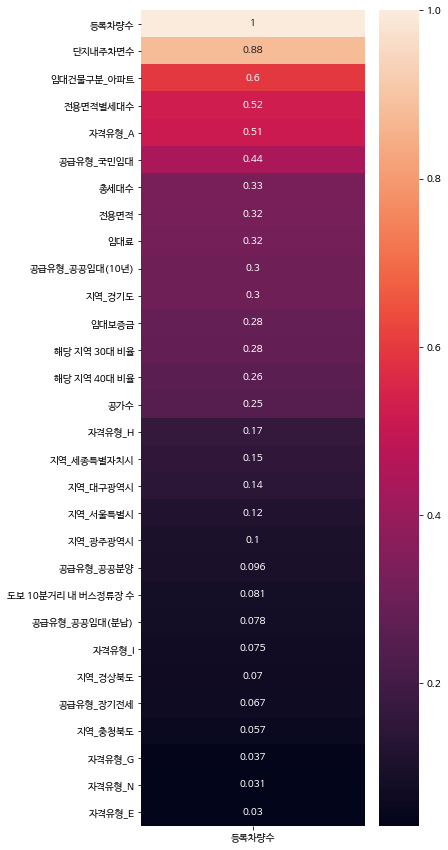

In [ ]:
corr_new_train = new_train.corr()
plt.figure(figsize=(5,15))
sns.heatmap(corr_new_train[['등록차량수']].sort_values(by=['등록차량수'],
                                ascending=False).head(30),annot=True)

In [ ]:
col_corr_dict = corr_new_train['등록차량수'].sort_values(ascending=False).to_dict()

In [ ]:
best_columns=[]
for key,value in col_corr_dict.items():
    if ((value>=0.2) & (value<0.9)) | (value<=-0.2):
        best_columns.append(key)
print(len(best_columns))

20


상관성이 큰 변수들을 20개 찾아주었습니다

In [ ]:
new_train = new_train.drop(['등록차량수'], axis=1)
new_train = new_train.drop(['단지코드'], axis=1)
new_test = new_test.drop(['단지코드'], axis=1)

In [ ]:
final_train = new_train[best_columns]
final_test = new_test[best_columns]
final_num = list(final_train.columns)

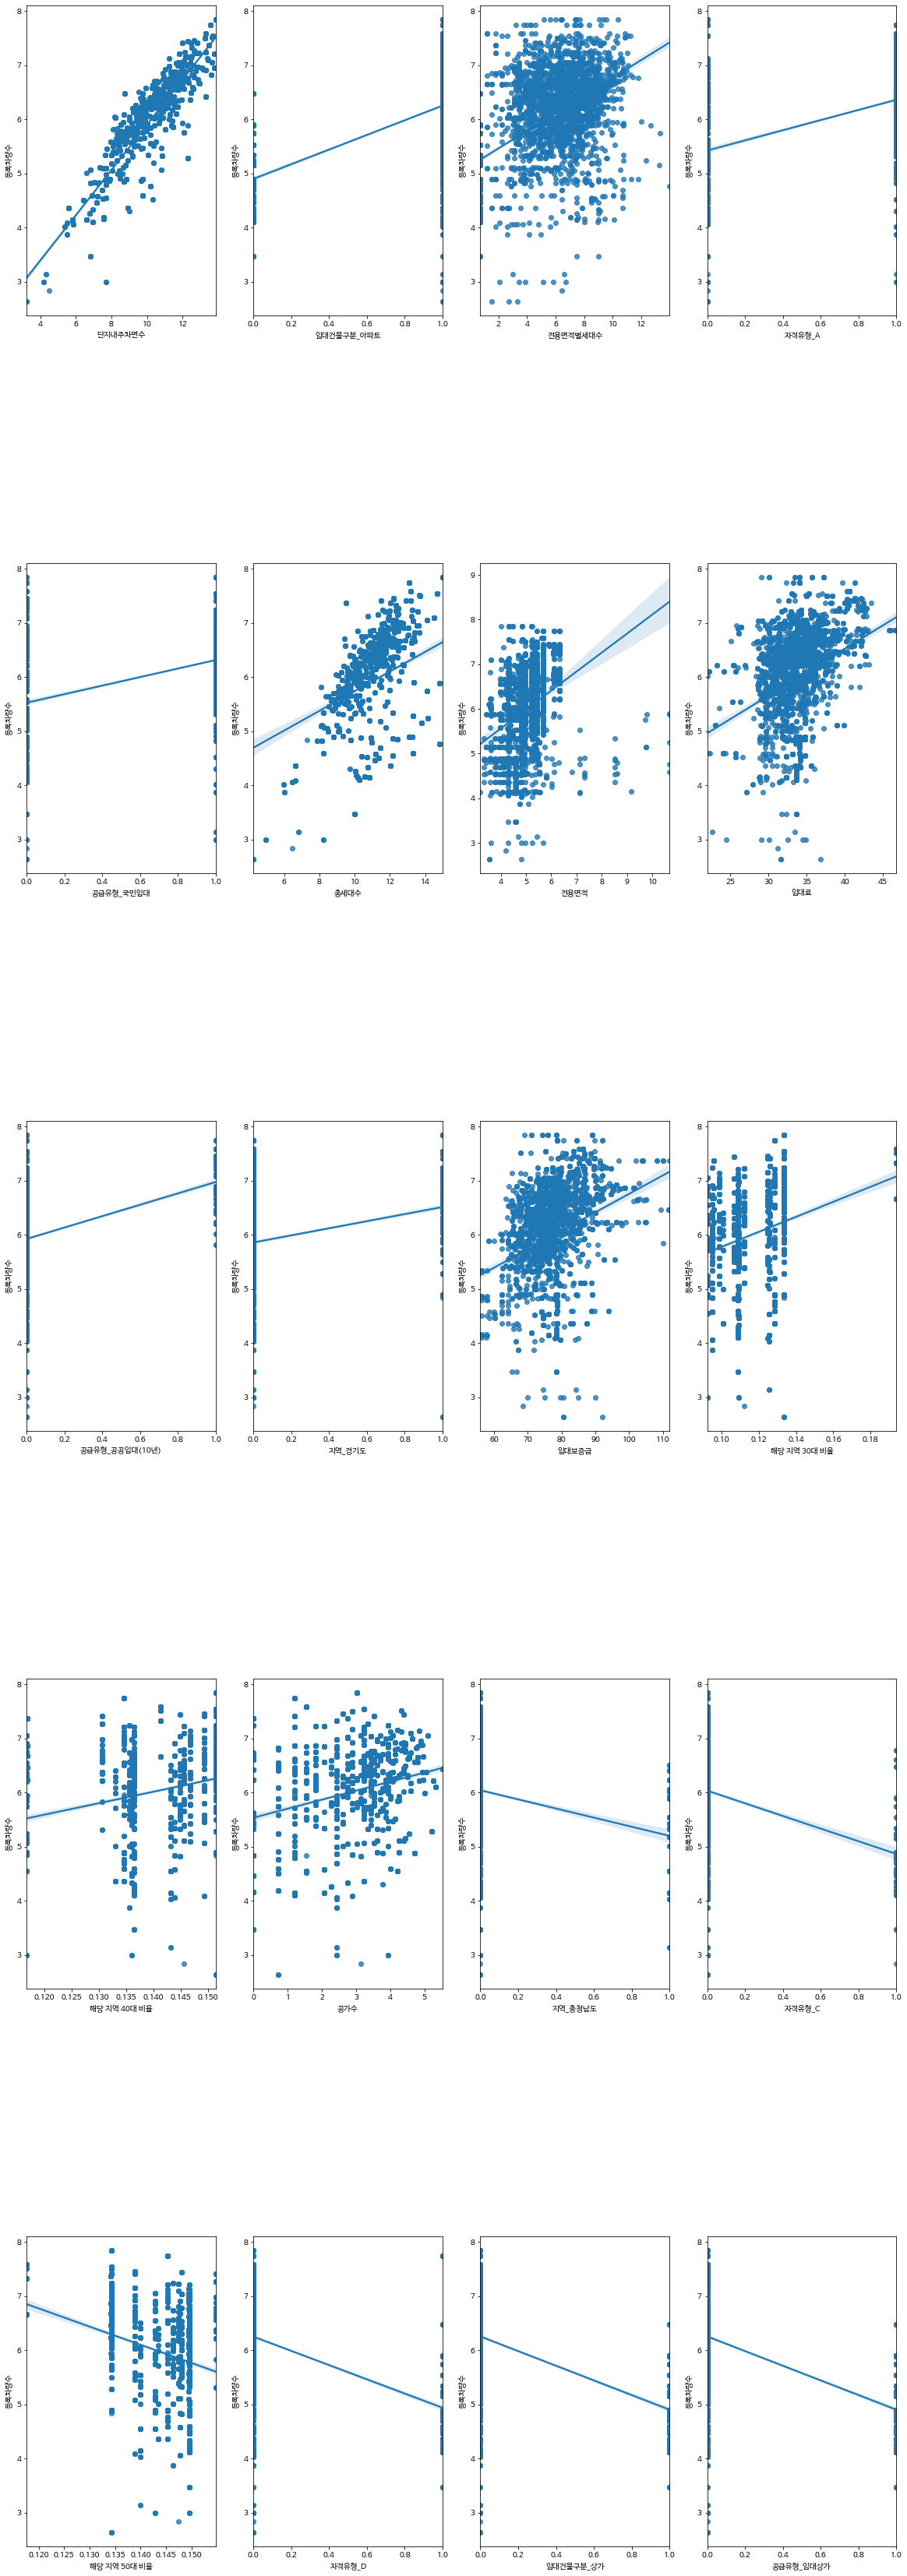

In [ ]:
row = 5
col = 4

fig, axs = plt.subplots(row,col, figsize = (20,60))
fig.subplots_adjust(hspace=0.8)

for r in range(0,row):
    for c in range(0,col):
        i = r*col + c
        if i < len(best_columns):
            sns.regplot(final_train[final_num[i]],target,fit_reg=True,marker='o', ax = axs[r][c])

**III. 모델링**

In [ ]:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression

0단계: Robust 스케일링/ 훈련&테스트 세트 분할

In [ ]:
from sklearn.preprocessing import RobustScaler

rbst_scaler=RobustScaler()
x_rbst=rbst_scaler.fit_transform(new_train)
test_rbst=rbst_scaler.transform(new_test)

from sklearn.model_selection import train_test_split

#훈련-테스트 분할// 분류문제가 아니므로 stratify=y 설정은 뺀다.
x_train_all, x_test, y_train_all, y_test = train_test_split(x_rbst, target, test_size=0.2, random_state=42)

print(len(x_train_all))
print(len(x_test))
print(len(y_train_all))
print(len(y_test))

2361
591
2361
591


a 단계: 단순선형 회귀

In [ ]:
import statsmodels.api as sm

model = sm.OLS(target.values, new_train)
re = model.fit()
re.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     417.6
Date:                Tue, 03 Aug 2021   Prob (F-statistic):               0.00
Time:                        09:55:24   Log-Likelihood:                -871.73
No. Observations:                2952   AIC:                             1835.
Df Residuals:                    2906   BIC:                             2111.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
총세대수                             0.1217      0.012      9.965      0.000       0.098       0.146
전용면적                            -0.0086      0.012     -0.709      0.478      -0.032       0.015
전용면적별세대수                         0.0051      0.004      1.376      0.169      -0.002       0.012
공가수                             -0.0254      0.006     -4.299      0.000      -0.037      -0.014
임대보증금                            0.0071      0.002      3.406      0.001       0.003       0.011
임대료                              0.0118      0.005      2.424      0.015       0.002       0.021
도보 10분거리 내 지하철역 수(환승노선 수 반영)    -0.1778      0.027     -6.595      0.000      -0.231      -0.125
도보 10분거리 내 버스정류장 수               0.0824      0.012      7.083      0.000       0.060       0.105
단지내주차면수                          0.2161      0.012     18.084      0.000       0.193       0.239
해당 지역 30대 비율                     0.1316      0.018      7.155      0.000       0.096       0.168
해당 지역 40대 비율                     0.1738      0.020      8.509      0.000       0.134       0.214
해당 지역 50대 비율                     0.1803      0.021      8.462      0.000       0.139       0.222
임대건물구분_상가                       -0.0050      0.055     -0.091      0.927      -0.112       0.102
임대건물구분_아파트                       1.2314      0.106     11.624      0.000       1.024       1.439
지역_강원도                           0.0964      0.027      3.581      0.000       0.044       0.149
지역_경기도                           0.0879      0.022      4.009      0.000       0.045       0.131
지역_경상남도                         -0.0236      0.020     -1.172      0.241      -0.063       0.016
지역_경상북도                          0.2404      0.031      7.795      0.000       0.180       0.301
지역_광주광역시                         0.2420      0.030      8.095      0.000       0.183       0.301
지역_대구광역시                         0.2475      0.035      7.070      0.000       0.179       0.316
지역_대전광역시                        -0.1561      0.029     -5.439      0.000      -0.212      -0.100
지역_부산광역시                         0.0795      0.030      2.683      0.007       0.021       0.138
지역_서울특별시                         0.0370      0.052      0.708      0.479      -0.065       0.139
지역_세종특별자치시                      -0.0514      0.054     -0.959      0.338      -0.156       0.054
지역_울산광역시                        -0.0581      0.054     -1.075      0.282      -0.164       0.048
지역_전라남도                          0.0773      0.027      2.821      0.005       0.024       0.131
지역_전라북도                          0.0858      0.032      2.677      0.007       0.023       0.149
지역_제주특별자치도                       0.1297      0.035      3.668      0.000       0.060       0.199
지역_충청남도                          0.1245      0.028      4.424      0.000    

b 단계: KFold/ lasso, elastic, random, gradient, xgbr, lgbmr 모두 사용

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold

kfold = KFold(n_splits=4)

In [ ]:
random_state = 1
reg = []

reg.append(Lasso(random_state = random_state))
reg.append(ElasticNet(random_state = random_state))
reg.append(RandomForestRegressor(random_state=random_state))
reg.append(GradientBoostingRegressor(random_state=random_state))
reg.append(XGBRegressor(silent=True,random_state=random_state))
reg.append(LGBMRegressor(verbose_eval=False,random_state = random_state))

In [ ]:
reg_results = []

for regre in reg :
    reg_results.append(np.mean(np.sqrt(-cross_val_score(regre, x_train_all, y = y_train_all, scoring = 'neg_mean_squared_error',
                                       cv = kfold, n_jobs=-4))))

print(reg_results)
reg_means = []
reg_std = []
for reg_result in reg_results:
    reg_means.append(reg_result.mean())
    reg_std.append(reg_result.std())

[0.8861838066418347, 0.8704829637174548, 0.14553040898598485, 0.2105364445350659, 0.21514478197195008, 0.16120534228365965]


In [ ]:
reg_re = pd.DataFrame({"CrossValMeans":reg_means,"CrossValerrors": reg_std})
reg_re

,CrossValMeans,CrossValerrors
0,0.886184,0.0
1,0.870483,0.0
2,0.145530,0.0
3,0.210536,0.0
4,0.215145,0.0
5,0.161205,0.0


In [ ]:
# XGBoost 파라미터 튜닝 / 130점 이상

XGB = XGBRegressor()
xgb_param_grid = {'learning_rate': [1,0.1,0.01,0.001],
              'n_estimators': [50, 100, 200, 500, 1000],
              'max_depth' : [1,3,5,10,50]}
gsXGB = GridSearchCV(XGB,param_grid = xgb_param_grid, cv=kfold, scoring="neg_mean_squared_error", n_jobs= 4, verbose = 1)
gsXGB.fit(x_train_all,y_train_all)
s = gsXGB.score(x_test, y_test)

print(s)
# 최고 점수
#gsXGB.best_score_

Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   25.7s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  2.5min
[Parallel(n_jobs=4)]: Done 400 out of 400 | elapsed:  7.3min finished


[10:03:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
-0.0089423350137439


In [ ]:
# RandomForest 파라미터 튜닝 / 130점, 387등

from sklearn.ensemble import RandomForestClassifier
Ran = RandomForestRegressor()
ran_params = { 'n_estimators' : [10,100],
           'max_depth' : [8,12],
           'min_samples_leaf' : [8,10],
           'min_samples_split' : [8,10]
            }
grid_cv = GridSearchCV(Ran, param_grid = ran_params, cv = kfold, n_jobs = -1)
grid_cv.fit(x_train_all,y_train_all)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 10, 'n_estimators': 100}
최고 예측 정확도: 0.9498


In [ ]:
ran_predict = grid_cv.predict(test_rbst)

submission_new = pd.DataFrame({
    "code" : test['단지코드'],
    "num" : np.expm1(ran_predict)
})

print(submission_new.head())
submission_new.to_csv('/content/drive/MyDrive/Colab Notebooks/주차수요 예측 AI/submission.csv')

    code         num
0  C1072  695.139167
1  C1072  724.374121
2  C1072  720.344794
3  C1072  720.344794
4  C1072  713.163364


In [ ]:
#LGBMClassifier 파라미터 튜닝 / 125점, 370등
LGB = LGBMRegressor()
lgb_param_grid = {
    'num_leaves' : [1,5,10],
    'learning_rate': [1,0.1,0.01,0.001],
    'n_estimators': [50, 100, 200, 500, 1000,5000], 
    'max_depth': [15,20,25],
    'num_leaves': [50, 100, 200],
    'min_split_gain': [0.3, 0.4],
}
gsLGB = GridSearchCV(LGB,param_grid = lgb_param_grid, cv=kfold, scoring="neg_mean_squared_error", n_jobs= 4, verbose = 1)
gsLGB.fit(x_train_all,y_train_all)
LGB_best = gsLGB.best_estimator_

print('최적 하이퍼 파라미터: ', gsLGB.best_params_)
print('최고 예측 정확도: {:.4f}'.format(gsLGB.best_score_))

Fitting 4 folds for each of 432 candidates, totalling 1728 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   21.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   55.4s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  1.8min
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:  4.0min
[Parallel(n_jobs=4)]: Done 1728 out of 1728 | elapsed: 12.5min finished


최적 하이퍼 파라미터:  {'learning_rate': 0.001, 'max_depth': 15, 'min_split_gain': 0.3, 'n_estimators': 5000, 'num_leaves': 100}
최고 예측 정확도: -0.0469


In [ ]:
ran_predict = gsLGB.predict(test_rbst)

submission_new = pd.DataFrame({
    "code" : test['단지코드'],
    "num" : np.expm1(ran_predict)
})

print(submission_new.head())
submission_new.to_csv('/content/drive/MyDrive/Colab Notebooks/주차수요 예측 AI/submission_feed(LGBM).csv')

    code         num
0  C1072  673.508471
1  C1072  702.087405
2  C1072  691.379184
3  C1072  691.379184
4  C1072  691.379184


In [ ]:
XGB_best = gsXGB.best_estimator_
LGB_best = gsLGB.best_estimator_
RAN_best = grid_cv.best_estimator_

# IV. 예측 

In [ ]:
#블랜딩, 스태킹, 보팅 써보기

a. 스태킹

In [ ]:
from mlxtend.regressor import StackingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.utils.testing import ignore_warnings

params = {'meta_regressor__C': [0.1, 1.0, 10.0, 100.0],
          'use_features_in_secondary' : [True, False]}

clf1 = XGB_best
clf2 = LGB_best
clf3 = RAN_best

lr = LogisticRegression()
st_re= StackingRegressor(regressors=[clf1, clf2, clf3], meta_regressor=RandomForestRegressor())
st_mod = st_re.fit(x_train_all,y_train_all)
st_pred = st_mod.predict(test_rbst)

submission = pd.DataFrame({
    "code" : test['단지코드'],
    "num" : np.expm1(st_pred)
})

submission.head()
submission.to_csv('/content/drive/MyDrive/Colab Notebooks/주차수요 예측 AI/submission.csv')

[10:16:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
print(submission.head())
submission.to_csv('/content/drive/MyDrive/Colab Notebooks/주차수요 예측 AI/submission.csv')

    code         num
0  C1072  670.619586
1  C1072  736.236514
2  C1072  688.642054
3  C1072  688.431431
4  C1072  707.385185
